Enter ETF ticker symbol (e.g., NIFTYBEES.NS): GOLDBEES.NS


/tmp/ipython-input-636630861.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, period=period, interval="1d")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-636630861.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_macd = float(macd.dropna().iloc[-1])
/tmp/ipython-input-636630861.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_signal = float(signal.dropna().iloc[-1])



📊 --- Tactical ETF Accumulation Report ---
Akash Raj 

⚪ *MODERATE ACCUMULATION* for GOLDBEES.NS
Neutral RSI, weak MACD → Gradual accumulation advised.
*Suggested*: Allocate *MEDIUM* proportion.


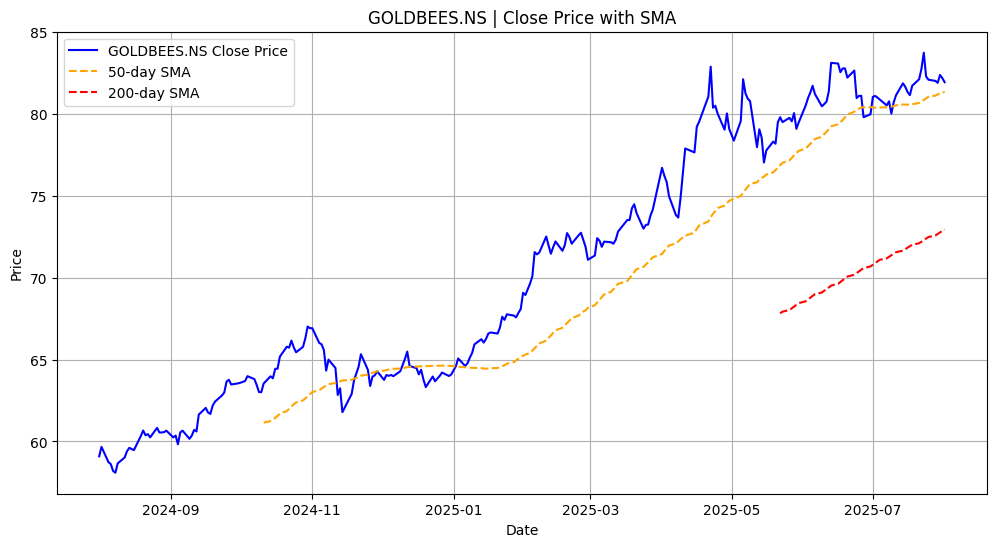

In [ ]:
# ✅ Tactical ETF Accumulation Timing Tool — CFO Edition with Telegram Alerts & SIP Reminders
# Google Colab Compatible ✅

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime

# Function to fetch ETF data
def fetch_etf_data(symbol, period="1y"):
    data = yf.download(symbol, period=period, interval="1d")
    return data.dropna()

# Function to calculate SMA
def calculate_sma(data, window):
    return data['Close'].rolling(window=window).mean()

# Function to calculate MACD
def calculate_macd(data):
    exp1 = data['Close'].ewm(span=12, adjust=False).mean()
    exp2 = data['Close'].ewm(span=26, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd, signal

# Function to calculate RSI
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    avg_gain = pd.Series(gain.flatten(), index=data.index).rolling(window=period).mean()
    avg_loss = pd.Series(loss.flatten(), index=data.index).rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to send Telegram alert
def send_telegram_message(bot_token, chat_id, message):
    url = f"https://api.telegram.org/bot{bot_token}/sendMessage"
    payload = {"chat_id": chat_id, "text": message, "parse_mode": "Markdown"}
    requests.post(url, data=payload)

# Tactical suggestion logic
def tactical_accumulation_strategy(rsi, macd, signal, symbol, bot_token=None, chat_id=None):
    latest_rsi = float(rsi.dropna().iloc[-1])
    latest_macd = float(macd.dropna().iloc[-1])
    latest_signal = float(signal.dropna().iloc[-1])

    recommendation = "Akash Raj \n\n"

    if latest_rsi < 40 and latest_macd < latest_signal:
        recommendation += (f"✅ *STRONG ACCUMULATION* for {symbol}\n"
                          f"Momentum weak, RSI low → Possible undervaluation phase.\n"
                          f"*Suggested*: Allocate *HIGH* proportion.")

    elif 40 <= latest_rsi <= 55 and latest_macd < latest_signal:
        recommendation += (f"⚪ *MODERATE ACCUMULATION* for {symbol}\n"
                          f"Neutral RSI, weak MACD → Gradual accumulation advised.\n"
                          f"*Suggested*: Allocate *MEDIUM* proportion.")

    elif latest_rsi > 60 and latest_macd > latest_signal:
        recommendation += (f"🔴 *AVOID/BOOK PROFITS* for {symbol}\n"
                          f"Momentum strong → Potential overbought zone.\n"
                          f"*Suggested*: Allocate *LOW* or *AVOID* new buys.")

    else:
        recommendation += (f"⚠️ *WAIT/OBSERVE* for {symbol}\n"
                          f"Mixed signals → Stay cautious, wait for clarity.")

    print("\n📊 --- Tactical ETF Accumulation Report ---")
    print(recommendation)

    # bot_token = "8052074405:AAGgiug5hqOjrJDiyjMaQovN3vtXPrBIaQo"
    # chat_id = "1986620790"

    if bot_token and chat_id:

        send_telegram_message(bot_token, chat_id, "✅ Your Tactical ETF Tool is LIVE AK!")
        send_telegram_message(bot_token, chat_id, recommendation)

# SIP-style reminder logic
def should_accumulate():
    today = datetime.now()
    return today.day in [1, 15]  # Customize as needed (e.g., SIP reminders on 1st and 15th)

# === CONFIG SECTION ===
bot_token = "8052074405:AAGgiug5hqOjrJDiyjMaQovN3vtXPrBIaQo"
chat_id = "1986620790"

symbol = input("Enter ETF ticker symbol (e.g., NIFTYBEES.NS): ").strip()
data = fetch_etf_data(symbol)

# Calculate indicators
sma_50 = calculate_sma(data, 50)
sma_200 = calculate_sma(data, 200)
macd, signal = calculate_macd(data)
rsi = calculate_rsi(data)

# Tactical Recommendation with Telegram Alert
tactical_accumulation_strategy(rsi, macd, signal, symbol, bot_token, chat_id)

# SIP-style Reminder Telegram Notification
if should_accumulate():
    sip_message = f"🗓️ *SIP Reminder*: Today is a scheduled accumulation day for *{symbol}*. Run tactical analysis before investing."
    send_telegram_message(bot_token, chat_id, sip_message)

# Optional: Plot closing price with SMA overlay
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label=f"{symbol} Close Price", color='blue')
plt.plot(sma_50, label="50-day SMA", color='orange', linestyle='--')
plt.plot(sma_200, label="200-day SMA", color='red', linestyle='--')
plt.title(f"{symbol} | Close Price with SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-1443012683.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, period=period, interval="1d")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1443012683.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_macd = float(macd.dropna().iloc[-1])
/tmp/ipython-input-1443012683.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_signal = float(signal.dropna().iloc[-1])



📊 --- Tactical ETF Accumulation Report ---
Dei Akash Raj 

 Indha(Stock/ETF/MF) GOLDBEES.NS ku
🔴 *AVOID/BOOK PROFITS* for GOLDBEES.NS
Momentum strong → Potential overbought zone.
*Suggested*: Allocate *LOW* or *AVOID* new buys.


/tmp/ipython-input-1443012683.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, period=period, interval="1d")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1443012683.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_macd = float(macd.dropna().iloc[-1])
/tmp/ipython-input-1443012683.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_signal = float(signal.dropna().iloc[-1])



📊 --- Tactical ETF Accumulation Report ---
Dei Akash Raj 

 Indha(Stock/ETF/MF) 0P0000YWL1.BO ku
⚪ *MODERATE ACCUMULATION* for 0P0000YWL1.BO
Neutral RSI, weak MACD → Gradual accumulation advised.
*Suggested*: Allocate *MEDIUM* proportion.


/tmp/ipython-input-1443012683.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, period=period, interval="1d")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1443012683.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_macd = float(macd.dropna().iloc[-1])
/tmp/ipython-input-1443012683.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_signal = float(signal.dropna().iloc[-1])



📊 --- Tactical ETF Accumulation Report ---
Dei Akash Raj 

 Indha(Stock/ETF/MF) NIFTYBEES.NS ku
⚪ *MODERATE ACCUMULATION* for NIFTYBEES.NS
Neutral RSI, weak MACD → Gradual accumulation advised.
*Suggested*: Allocate *MEDIUM* proportion.


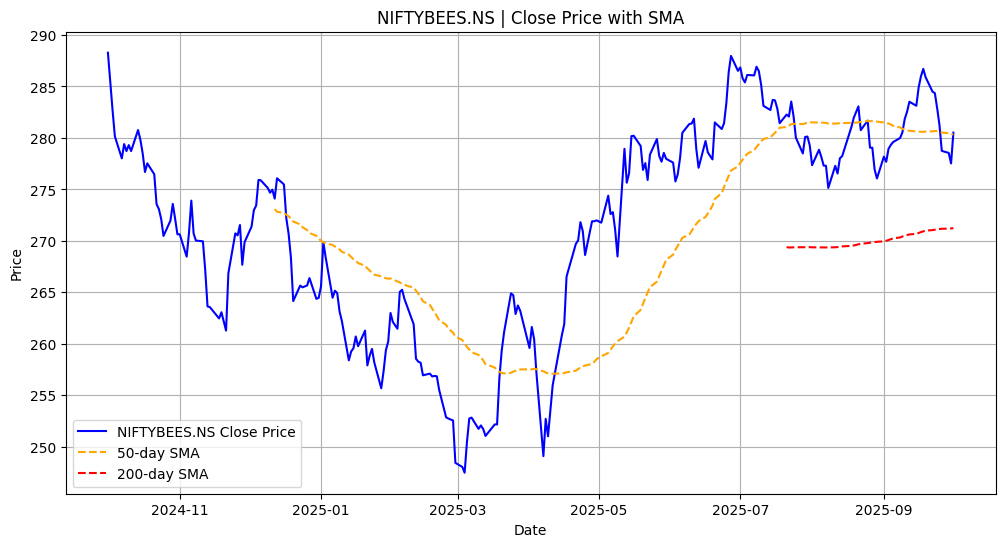

In [ ]:
# ✅ Tactical ETF Accumulation Timing Tool — CFO Edition with Telegram Alerts & SIP Reminders
# Google Colab Compatible ✅

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime

# Function to fetch ETF data
def fetch_etf_data(symbol, period="1y"):
    data = yf.download(symbol, period=period, interval="1d")
    return data.dropna()

# Function to calculate SMA
def calculate_sma(data, window):
    return data['Close'].rolling(window=window).mean()

# Function to calculate MACD
def calculate_macd(data):
    exp1 = data['Close'].ewm(span=12, adjust=False).mean()
    exp2 = data['Close'].ewm(span=26, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd, signal

# Function to calculate RSI
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    avg_gain = pd.Series(gain.flatten(), index=data.index).rolling(window=period).mean()
    avg_loss = pd.Series(loss.flatten(), index=data.index).rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to send Telegram alert
def send_telegram_message(bot_token, chat_id, message):
    url = f"https://api.telegram.org/bot{bot_token}/sendMessage"
    payload = {"chat_id": chat_id, "text": message, "parse_mode": "Markdown"}
    requests.post(url, data=payload)

# Tactical suggestion logic
def tactical_accumulation_strategy(rsi, macd, signal, symbol, bot_token=None, chat_id=None):
    latest_rsi = float(rsi.dropna().iloc[-1])
    latest_macd = float(macd.dropna().iloc[-1])
    latest_signal = float(signal.dropna().iloc[-1])

    recommendation = "Dei Akash Raj \n\n Indha(Stock/ETF/MF) "+symbol+" ku\n"

    if latest_rsi < 40 and latest_macd < latest_signal:
        recommendation += (f"✅ *STRONG ACCUMULATION* for {symbol}\n"
                          f"Momentum weak, RSI low → Possible undervaluation phase.\n"
                          f"*Suggested*: Allocate *HIGH* proportion.")

    elif 40 <= latest_rsi <= 55 and latest_macd < latest_signal:
        recommendation += (f"⚪ *MODERATE ACCUMULATION* for {symbol}\n"
                          f"Neutral RSI, weak MACD → Gradual accumulation advised.\n"
                          f"*Suggested*: Allocate *MEDIUM* proportion.")

    elif latest_rsi > 60 and latest_macd > latest_signal:
        recommendation += (f"🔴 *AVOID/BOOK PROFITS* for {symbol}\n"
                          f"Momentum strong → Potential overbought zone.\n"
                          f"*Suggested*: Allocate *LOW* or *AVOID* new buys.")

    else:
        recommendation += (f"⚠️ *WAIT/OBSERVE* for {symbol}\n"
                          f"Mixed signals → Stay cautious, wait for clarity.")

    print("\n📊 --- Tactical ETF Accumulation Report ---")
    print(recommendation)


    if bot_token and chat_id:

        send_telegram_message(bot_token, chat_id, "✅ Your Tactical ETF Tool is LIVE AK!")
        send_telegram_message(bot_token, chat_id, recommendation)

# SIP-style reminder logic
def should_accumulate():
    today = datetime.now()
    return today.day in [1, 15]  # Customize as needed (e.g., SIP reminders on 1st and 15th)

# === CONFIG SECTION ===
bot_token = "8052074405:AAGgiug5hqOjrJDiyjMaQovN3vtXPrBIaQo"
chat_id = "1986620790"


symbolList=['GOLDBEES.NS','0P0000YWL1.BO','NIFTYBEES.NS']
for i in symbolList:
  symbol=i
  data = fetch_etf_data(symbol)
  sma_50 = calculate_sma(data, 50)
  sma_200 = calculate_sma(data, 200)
  macd, signal = calculate_macd(data)
  rsi = calculate_rsi(data)
  tactical_accumulation_strategy(rsi, macd, signal, symbol, bot_token, chat_id)




# SIP-style Reminder Telegram Notification
if should_accumulate():
    sip_message = f"🗓️ *SIP Reminder*: Today is a scheduled accumulation day. Run tactical analysis before investing."
    send_telegram_message(bot_token, chat_id, sip_message)

# Optional: Plot closing price with SMA overlay
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label=f"{symbol} Close Price", color='blue')
plt.plot(sma_50, label="50-day SMA", color='orange', linestyle='--')
plt.plot(sma_200, label="200-day SMA", color='red', linestyle='--')
plt.title(f"{symbol} | Close Price with SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
